#### 1.Write Python code to perform a 2D convolution operation using a 3x3 kernel on a small grayscale image represented as a matrix.

In [1]:
import numpy as np

def convolve2d(padded_image, kernel):
    image_h, image_w = padded_image.shape[0] - 2, padded_image.shape[1] - 2
    kernel_h, kernel_w = kernel.shape
    output = np.zeros((image_h, image_w), dtype=int)  # Output as integers

    for i in range(image_h):
        for j in range(image_w):
            region = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = int(np.sum(region * kernel))
    return output


image = np.array([
    [2, 2, 2, 2],
    [2, 4, 4, 2],
    [2, 4, 4, 2],
    [2, 2, 2, 2]
])


padded_core = np.pad(image, ((1, 1), (1, 1)), mode='constant')


kernel = np.array([
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0]
])

result = convolve2d(padded_core, kernel)


print("Original 4x4 Image:\n", image)
print("\nAdd Padding → 6x6 Core Image:\n", padded_core)
print("\nConvolution Result on 4x4 Core:\n", result)


Original 4x4 Image:
 [[2 2 2 2]
 [2 4 4 2]
 [2 4 4 2]
 [2 2 2 2]]

Add Padding → 6x6 Core Image:
 [[0 0 0 0 0 0]
 [0 2 2 2 2 0]
 [0 2 4 4 2 0]
 [0 2 4 4 2 0]
 [0 2 2 2 2 0]
 [0 0 0 0 0 0]]

Convolution Result on 4x4 Core:
 [[4 0 0 4]
 [0 4 4 0]
 [0 4 4 0]
 [4 0 0 4]]


#### 2.Implement image classification using CNN.
#### 3.Load an image, preprocess it, and classify it using the pretrained ResNet50 model.

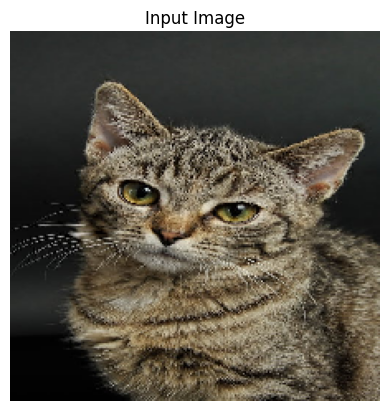

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step

Top Predictions:
1. tabby (82.99%)
2. tiger_cat (14.77%)
3. Egyptian_cat (1.45%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Load the pretrained ResNet50 model with ImageNet weights
model = ResNet50(weights='imagenet')

# Load and display the image
img_path = "image-2.jpeg" 
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict with ResNet50
predictions = model.predict(x)

# Decode and print top 3 predictions
decoded_preds = decode_predictions(predictions, top=3)[0]
print("\nTop Predictions:")
for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
    print(f"{i+1}. {label} ({prob*100:.2f}%)")


#### Convert Image into Grayscale

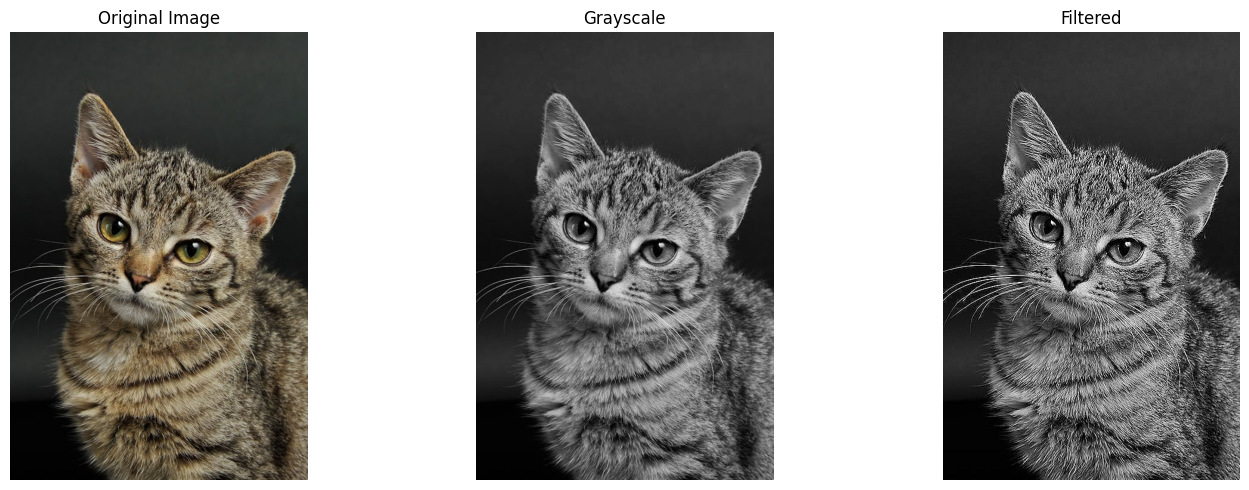

In [1]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Function to convert a BGR image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Laplacian-like filter (sharpening filter)
filter_1 = np.array([
    [-1, 4, -1],
    [0, -1, 0],
    [0, 0, 0]
], dtype=np.float32)
# Function to apply the filter using convolution
def apply_filter(image, filter_kernel):
    filtered_image = scipy.signal.convolve2d(image, filter_kernel, mode='valid')
    return np.clip(filtered_image, 0, 255).astype(np.uint8)

# Read the image
image = cv2.imread("image-2.jpeg")

if image is None:
    print("Error: Image could not be loaded.")
else:
    # Convert to grayscale
    gray = convert_to_grayscale(image)
    # Apply the filter
    filtered = apply_filter(gray, filter_1)
    # Convert BGR to RGB for correct display with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Show original, grayscale, and filtered images side by side
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(filtered, cmap='gray')
    plt.title("Filtered")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

#### Using Multiple Kernels

In [7]:
import numpy as np

# Original 4x4 image
image = np.array([
    [2, 2, 2, 2],
    [2, 4, 4, 2],
    [2, 4, 4, 2],
    [2, 2, 2, 2]
], dtype=float)

print("Original Image :\n", image)

# Dictionary of kernels
kernels = {
    "Laplacian": np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ]),

    "Sobel Horizontal": np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),

    "Sobel Vertical": np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]),

    "Prewitt Horizontal": np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]),

    "Prewitt Vertical": np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]),

    "Sharpen": np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),

    "Identity": np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]
    ])
}

# Pad the original image to fit 3x3 kernel
padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
print("\nPaded Image :\n", padded_image)

# Apply each kernel
for name, kernel in kernels.items():
    kernel_flipped = np.flipud(np.fliplr(kernel))  # Flip for convolution
    output = np.zeros_like(image)

    # Perform convolution
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_image[i:i+3, j:j+3]
            output[i, j] = np.sum(region * kernel_flipped)

    # Print results
    print(f"\n=== {name} Kernel ===")
    print("Kernel:\n", kernel)
    # print("Paded Image :\n", padded_image)
    print("Convolved Output:\n", output.astype(int))

Original Image :
 [[2. 2. 2. 2.]
 [2. 4. 4. 2.]
 [2. 4. 4. 2.]
 [2. 2. 2. 2.]]

Paded Image :
 [[0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 0.]
 [0. 2. 4. 4. 2. 0.]
 [0. 2. 4. 4. 2. 0.]
 [0. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0.]]

=== Laplacian Kernel ===
Kernel:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Convolved Output:
 [[4 0 0 4]
 [0 4 4 0]
 [0 4 4 0]
 [4 0 0 4]]

=== Sobel Horizontal Kernel ===
Kernel:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Convolved Output:
 [[ -8  -2   2   8]
 [-14  -6   6  14]
 [-14  -6   6  14]
 [ -8  -2   2   8]]

=== Sobel Vertical Kernel ===
Kernel:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Convolved Output:
 [[ -8 -14 -14  -8]
 [ -2  -6  -6  -2]
 [  2   6   6   2]
 [  8  14  14   8]]

=== Prewitt Horizontal Kernel ===
Kernel:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
Convolved Output:
 [[ -6  -2   2   6]
 [-10  -4   4  10]
 [-10  -4   4  10]
 [ -6  -2   2   6]]

=== Prewitt Vertical Kernel ===
Kernel:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Convolved Output:
 [[ -6 -10 -10  -6]


#### Q. Apply any CNN Filters on image to Grayscale and Edgedetection

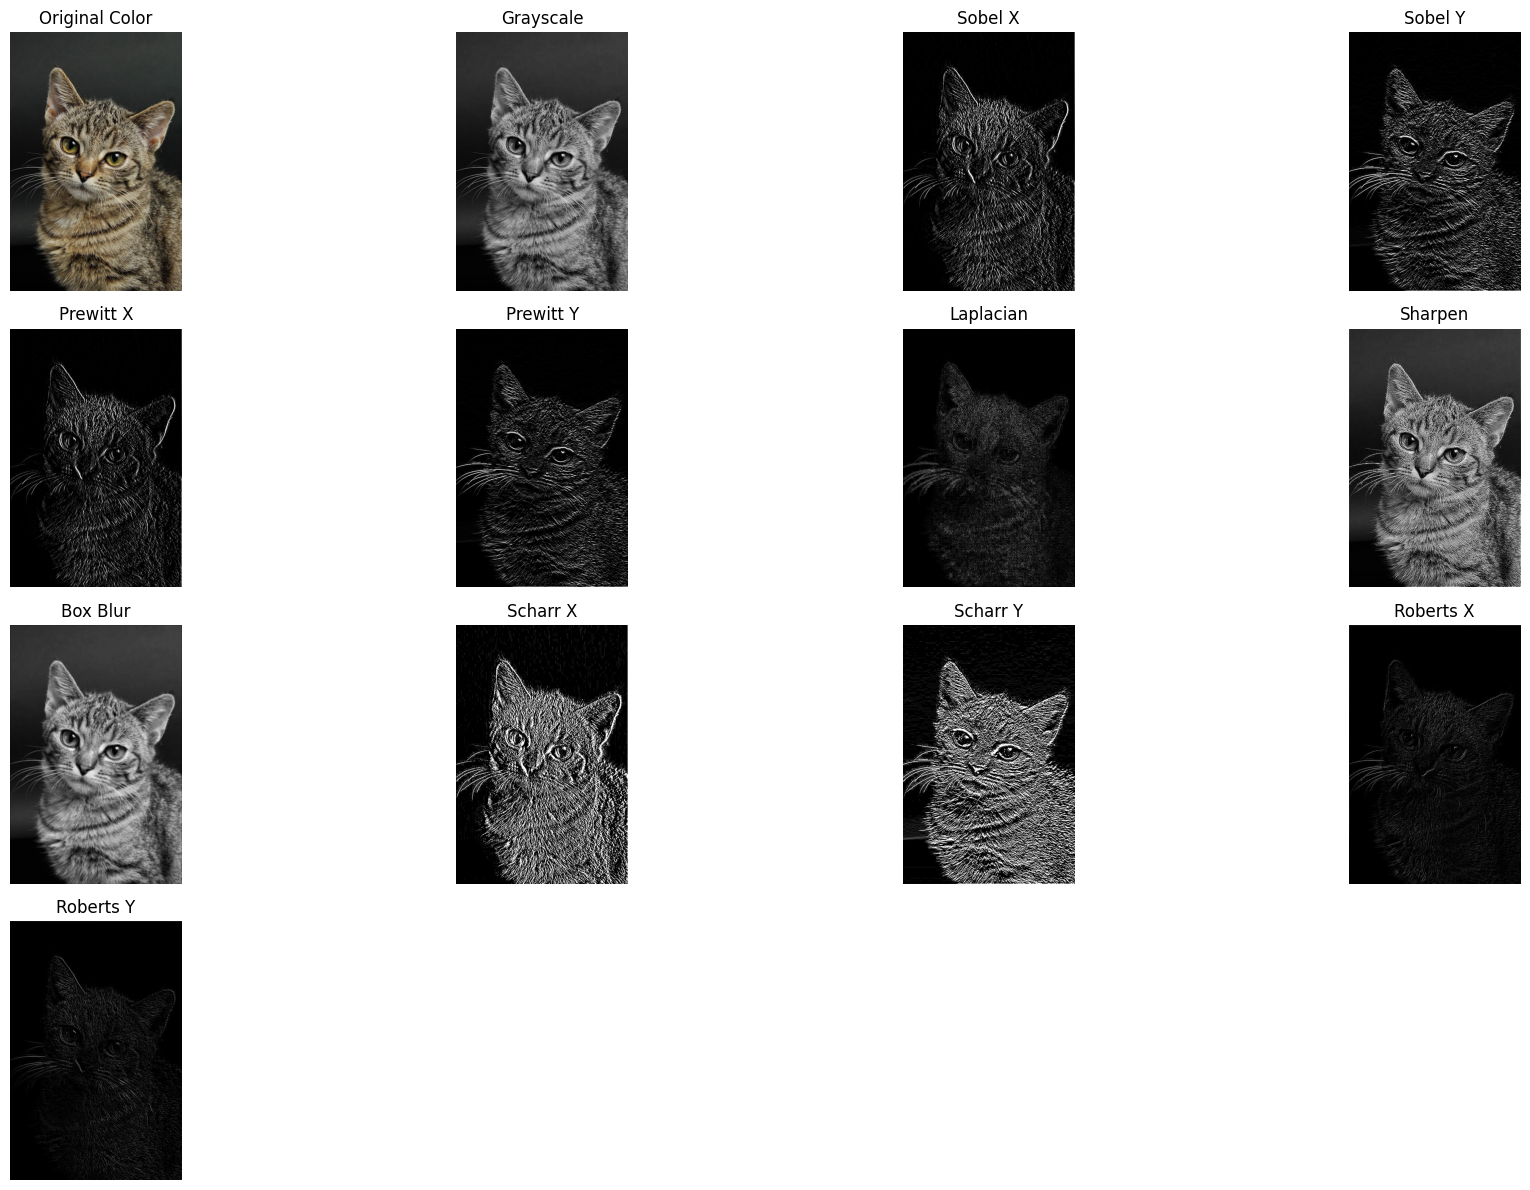

In [1]:
# Q. Apply any CNN Filters on image to Grayscale and Edgedetection

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Read and convert the image
image = cv2.imread("image-2.jpeg")
if image is None:
    print("Error: Image could not be loaded.")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert original image to RGB for matplotlib display
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define CNN-like filters
filters = {
    'Sobel X': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32), 
    'Sobel Y': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32),
    'Prewitt X': np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32),
    'Prewitt Y': np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32),
    'Laplacian': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32),
    'Box Blur': np.ones((3, 3), dtype=np.float32) / 9.0,
    'Scharr X': np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]], dtype=np.float32),
    'Scharr Y': np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]], dtype=np.float32),
    'Roberts X': np.array([[1, 0], [0, -1]], dtype=np.float32),
    'Roberts Y': np.array([[0, 1], [-1, 0]], dtype=np.float32)
}

# Sobel Horizontal – Finds left-right edges.
# Sobel Vertical – Finds top-bottom edges.
# Prewitt Horizontal – Detects side edges (simpler version of Sobel).
# Prewitt Vertical – Detects up-down edges.
# Laplacian – Finds all edges at once.
# Sharpen – Makes image details clearer.
# Box Blur – Softens image evenly.
# Gaussian Blur – Blurs smoothly and naturally.
# Emboss – Adds a raised 3D effect.
# Identity – Does nothing (shows original).


# Function to apply filter
def apply_filter(image, kernel):
    filtered = scipy.signal.convolve2d(image, kernel, mode='same')
    return np.clip(filtered, 0, 255).astype(np.uint8)

# Apply all filters
filtered_images = {name: apply_filter(gray, kernel) for name, kernel in filters.items()}

# Plot original color, grayscale, and filtered images
plt.figure(figsize=(18, 12))

# Original RGB
plt.subplot(4, 4, 1) # EDIT THIS LINE TO SORT IMAGE POSITION
plt.imshow(rgb_image)
plt.title("Original Color")
plt.axis('off')

# Original Grayscale
plt.subplot(4, 4, 2) # EDIT THIS LINE TO SORT IMAGE POSITION
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Display each filter result
for idx, (name, img) in enumerate(filtered_images.items(), start=3):
    plt.subplot(4, 4, idx) # EDIT THIS LINE TO SORT IMAGE POSITION
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()
